# Confirmed positive cases of COVID-19 in Ontario


### Source: https://data.ontario.ca/dataset/confirmed-positive-cases-of-covid-19-in-ontario


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
DF = pd.read_csv("conposcovidloc.csv")

### Let's understand what the dataset is comprised of :

In [2]:
print (DF.describe())
print(DF.dtypes)

             Row_ID  Reporting_PHU_Latitude  Reporting_PHU_Longitude
count  24187.000000            24187.000000             24187.000000
mean   12094.000000               43.804660               -79.406141
std     6982.329817                0.762604                 1.650097
min        1.000000               42.308796               -94.488254
25%     6047.500000               43.647471               -79.708893
50%    12094.000000               43.656591               -79.379358
75%    18140.500000               43.898605               -79.379358
max    24187.000000               49.769615               -74.736298
Row_ID                         int64
Accurate_Episode_Date         object
Age_Group                     object
Client_Gender                 object
Case_AcquisitionInfo          object
Outcome1                      object
Reporting_PHU                 object
Reporting_PHU_Address         object
Reporting_PHU_City            object
Reporting_PHU_Postal_Code     object
Reporting

In [3]:
DF.head()

,Row_ID,Accurate_Episode_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-04-29,50s,FEMALE,Information pending,Resolved,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
1,2,2020-05-09,20s,FEMALE,Information pending,Not Resolved,Peel Public Health,7120 Hurontario Street,Mississauga,L5W 1N4,www.peelregion.ca/health/,43.647471,-79.708893
2,3,2020-05-09,20s,MALE,Contact of a confirmed case,Not Resolved,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
3,4,2020-04-28,30s,FEMALE,Contact of a confirmed case,Resolved,Halton Region Health Department,1151 Bronte Road,Oakville,L6M 3Ll,www.halton.ca/For-Residents/Public-Health/,43.413997,-79.744796
4,5,2020-04-30,50s,FEMALE,Neither,Resolved,Durham Region Health Department,605 Rossland Road East,Whitby,L1N 0B2,www.durham.ca/en/health-and-wellness/health-an...,43.898605,-78.940341


### There are several interesting attributes here. Given how COVID cases can be peculiar and this dataset being a snapshot in time at one province, a predictive model won't exactly prove useful. But let's try to create some visualizations to better understand the layout in Ontario and the insights the features might give.

In [4]:
rows = DF.shape[0]
columns = DF.shape[1]
print(rows)
print(columns)

24187
13


## Number of positive cases across a period of 4+ months. Dates are approximate. 

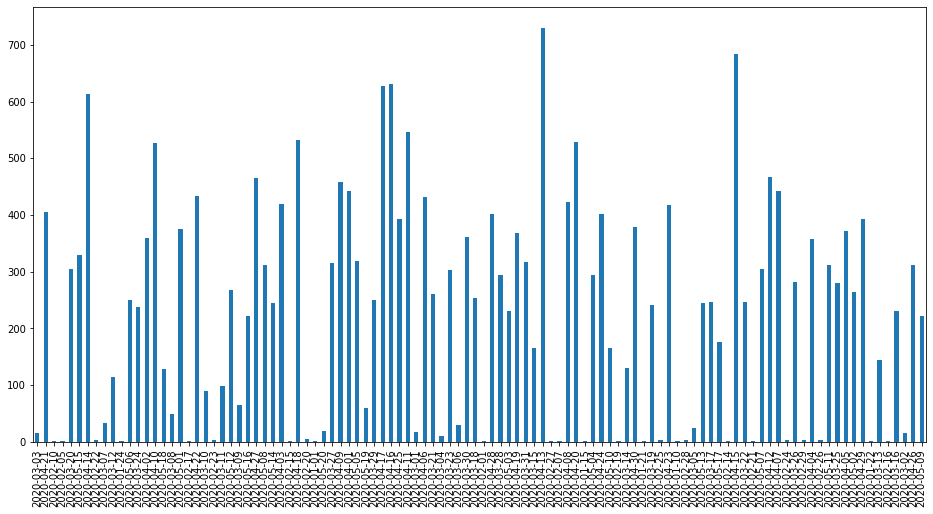

In [5]:
DF.Accurate_Episode_Date.value_counts(sort=False).plot.bar(figsize=(16,8))

### 13th and 15th of April reported the highest number of cases so far.

## Pie chart of case outcome.

Outcome1
Fatal            1993
Not Resolved     3685
Resolved        18509
dtype: int64


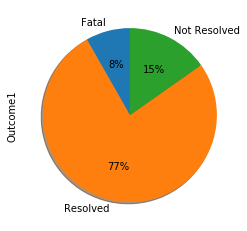

In [6]:
DF.Outcome1.value_counts(sort=False).plot.pie(autopct='%1.0f%%',shadow=True, startangle=90)
print(DF.groupby('Outcome1').size())

## Pie chart to show distribution of gender. (Surprisingly this data makes Canada stand out from other countries - who have reported their vast majority of cases to be men.)

Client_Gender
FEMALE         13735
MALE           10279
OTHER              6
TRANSGENDER        3
UNKNOWN          164
dtype: int64


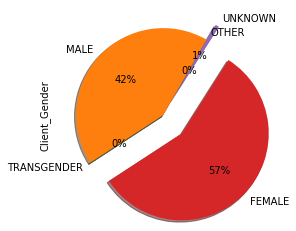

In [22]:
explode = (0,0,0,0.3,0.2)
DF.Client_Gender.value_counts(sort=False).plot.pie(autopct='%1.0f%%',shadow=True,startangle = 60,explode = explode)
print(DF.groupby('Client_Gender').size())

## City which has reported the highest number of cases.

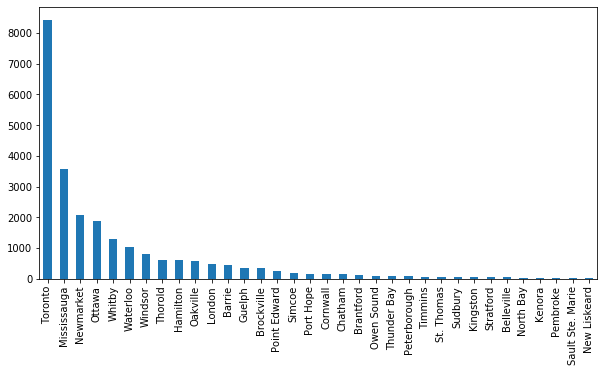

In [7]:
DF.Reporting_PHU_City.value_counts(sort=True).plot.bar(figsize = (10,5))

## The age group in Ontario that is more prone to COVID-19.

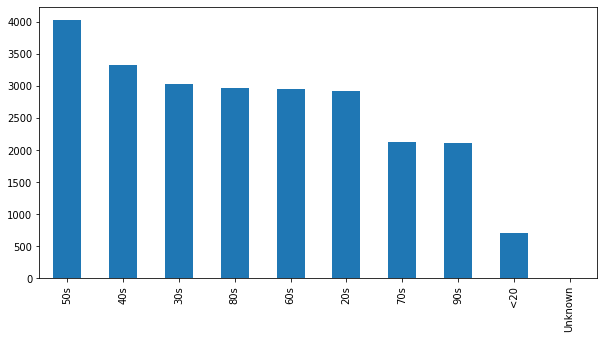

In [8]:
DF.Age_Group.value_counts(sort=True).plot.bar(figsize=(10,5))

## Case outcome v Gender. 

### Since there are more number of female cases, resolved and fatal outcomes could be higher for women.

AxesSubplot(0.125,0.125;0.775x0.755)


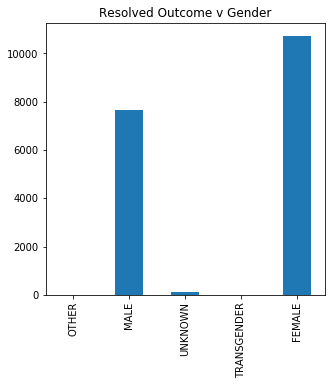

In [9]:
r_DF = DF.loc[DF['Outcome1'] == 'Resolved']
print(r_DF.Client_Gender.value_counts(sort=False).plot.bar(figsize=(5,5),title='Resolved Outcome v Gender'))

AxesSubplot(0.125,0.125;0.775x0.755)


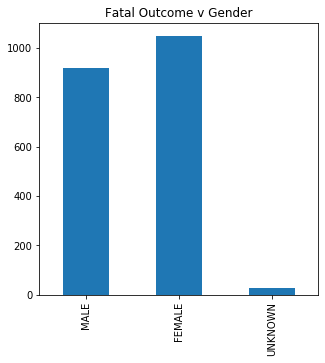

In [10]:
f_DF = DF.loc[DF['Outcome1'] == 'Fatal']
print(f_DF.Client_Gender.value_counts(sort=False).plot.bar(figsize=(5,5),title='Fatal Outcome v Gender'))

## Let's plot (Age + Gender) v Case Outcome to identify the weakest age group among males and females.

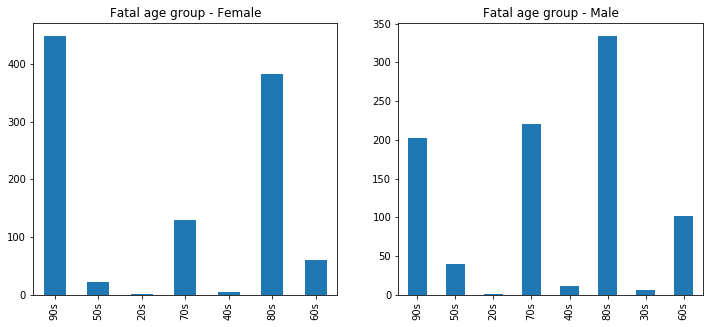

In [11]:
ff_DF = DF[(DF['Outcome1'] == 'Fatal') & (DF['Client_Gender'] == 'FEMALE')]
fm_DF = DF[(DF['Outcome1'] == 'Fatal') & (DF['Client_Gender'] == 'MALE')]
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
ff_DF.Age_Group.value_counts(sort=False).plot.bar(ax=axes[0], title='Fatal age group - Female')
fm_DF.Age_Group.value_counts(sort=False).plot.bar(ax=axes[1], title='Fatal age group - Male')

### The above charts make sense as people who are old can potentially succumb to the disease the most. But there is a stark difference between the above and the common age group for the whole dataset (across all 3 outcomes) - 50s

## Let's try similar graphs, but for Outcome v Public Health Units.  

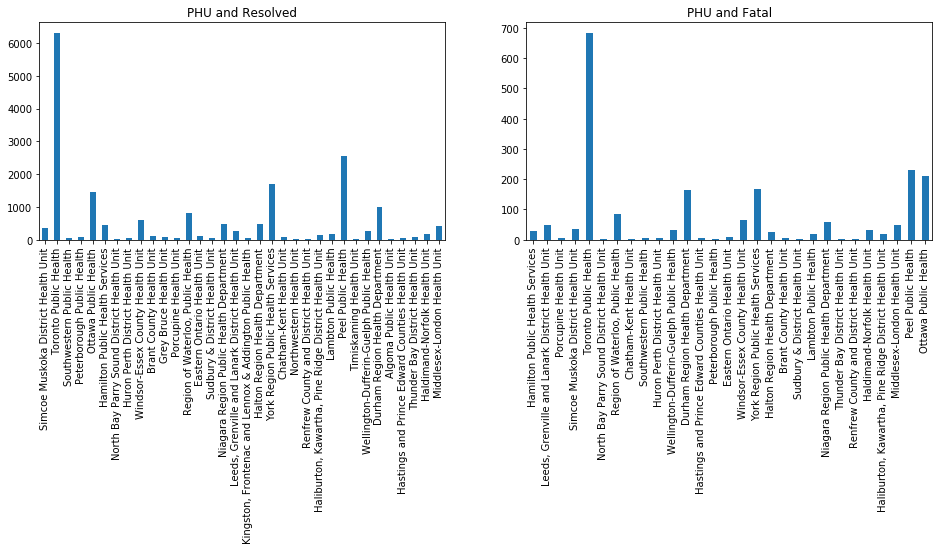

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,4))
r_DF.Reporting_PHU.value_counts(sort=False).plot.bar(title='PHU and Resolved',ax=axes[0])
f_DF.Reporting_PHU.value_counts(sort=False).plot.bar(title='PHU and Fatal',ax=axes[1])

### This confirms that Toronto is an active hotspot for COVID-19 in Ontario. Owing definitely to its dense population and activity. As a result - the largest number of cases and its PHU reporting the most deaths and survivals. 

In [13]:
#To confirm if the numbers in the graphs are right:
print(r_DF.loc[r_DF['Reporting_PHU']== 'Toronto Public Health'].shape[0])
print(f_DF.loc[f_DF['Reporting_PHU']== 'Toronto Public Health'].shape[0])

6315
684


## Since we have location coordinates in the dataset, let's plot them on a map to see the case concentration.

In [14]:
import geopandas
gdf = geopandas.GeoDataFrame(DF, geometry=geopandas.points_from_xy(DF.Reporting_PHU_Longitude, DF.Reporting_PHU_Latitude))
geopandas.datasets.available
rows = gdf.shape[0]
columns = gdf.shape[1]
print(rows)
print(columns)

24187
14


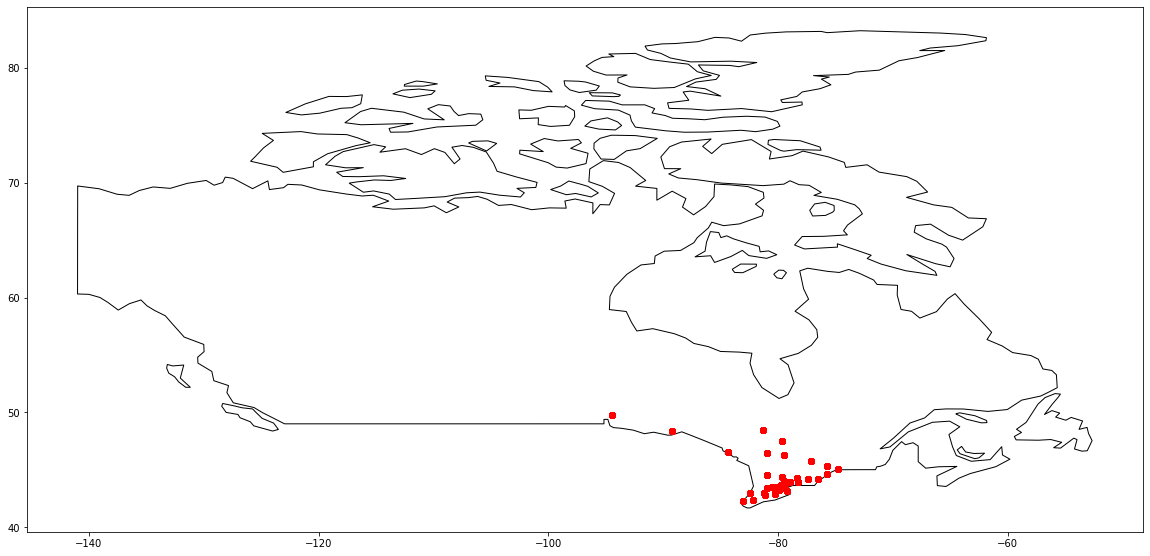

In [15]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
#Restricting to North America - Canada
ax = world[world.name == 'Canada'].plot(figsize=(20,10),color='white', edgecolor='black')
#Plotting geodataframe
gdf.plot(ax=ax, color='red', figsize=(10,10))
plt.show()

## In all three outcomes, travel played the least important role.

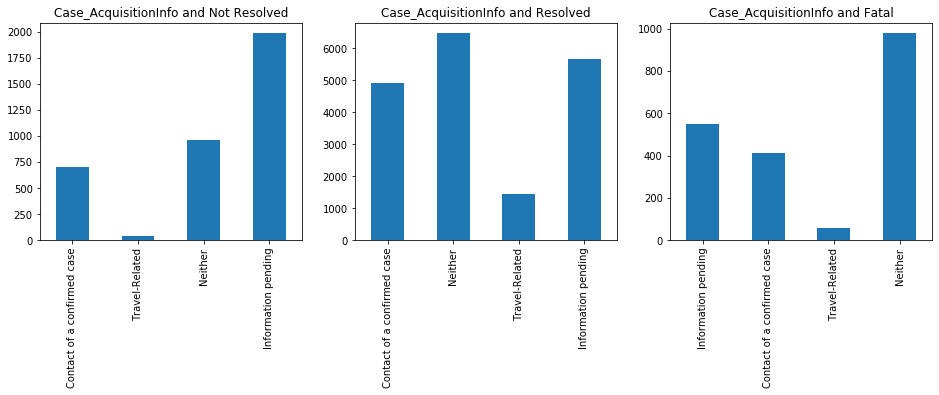

In [16]:
nr_DF = DF.loc[DF['Outcome1'] == 'Not Resolved']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,4))
nr_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Not Resolved', ax=axes[0])
r_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Resolved', ax=axes[1])
f_DF.Case_AcquisitionInfo.value_counts(sort=False).plot.bar(title='Case_AcquisitionInfo and Fatal', ax=axes[2])

## Some ideas that can be tried:
### 1. Chi-Square test of Independence to check signficant relationship between two categorical attributes.
### 2. Use the dates to find a possible case growth trajectory ?